顾名思义，和弦是将多个Pitch对象组合在一起的对象。它们被定义在music21.chord模块中找到。创建Chord对象的最通用方法就是传入所需的音高名称列表：


In [1]:
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"])

Note和Chord对象，因为它们都是GeneralNote对象的子类，它们 具有许多共同的特征：

In [2]:
cMinor.duration.type = 'half'
cMinor.quarterLength

2.0

但是由于Chord包含许多音高，因此它没有 .pitch属性：

In [3]:
cMinor.pitch

AttributeError: 'Chord' object has no attribute 'pitch'

取而代之的是，它具有一个.pitches 属性，该属性返回和弦中的音高元组。

In [3]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

.pitches返回一个元组，元祖是什么？一个元组就像一个列表，除了与带有方括号的列表不同，一个元组在其周围带有括号：

In [5]:
baroqueTuple = ('Bach', 'Handel', 'Telemann')
classicalList = ['Mozart', 'Haydn', 'Beethoven']

baroqueTuple

('Bach', 'Handel', 'Telemann')

In [6]:
classicalList

['Mozart', 'Haydn', 'Beethoven']

元组和列表都可以通过用方括号中的数字访问它们来查找成员：

In [7]:
baroqueTuple[0]

'Bach'

In [8]:
classicalList[0]

'Mozart'

但是两者之间最大的区别是您可以操作列表，但不能操作元组。如果我们尝试将某人添加到classicList，则使用.append它的效果很好。

In [9]:
classicalList.append('Ella Fitzgerald') # she's a classic to me...

classicalList

['Mozart', 'Haydn', 'Beethoven', 'Ella Fitzgerald']

In [10]:
classicalList.remove('Mozart')

classicalList

['Haydn', 'Beethoven', 'Ella Fitzgerald']

但是一个元组不能改变：

In [11]:
baroqueTuple.append('Miles Davis')

AttributeError: 'tuple' object has no attribute 'append'

在这种情况下，这很遗憾，因为Miles属于Bach！因此，我们不应该在那里使用元组。

但是在.pitches它的类中，它返回一个元组是有意义的，因为更改与.pitches和弦分开的结果可能是模棱两可的–您是否要更改.pitches和弦本身的结果或改变和弦的音高？music21通常会在操作结果可能导致头痛或错误的地方返回元组。无论如何，将元组转换为列表很容易，反之亦然：

In [12]:
baroqueList = list(baroqueTuple)
baroqueList.append('Miles Davis')
baroqueList

['Bach', 'Handel', 'Telemann', 'Miles Davis']

In [13]:
classicalTuple = tuple(classicalList)
classicalTuple

('Haydn', 'Beethoven', 'Ella Fitzgerald')

好吧，回到和弦，从这里开始：

In [14]:
cMinor.pitches

(<music21.pitch.Pitch C4>, <music21.pitch.Pitch G4>, <music21.pitch.Pitch E-5>)

但是我们已经知道如何获取chords里的音高了！我们还能做什么？

如何确定它是大和弦还是小和弦呢？

In [15]:
cMinor.isMajorTriad()

False

In [16]:
cMinor.isMinorTriad()

True

还可以判断它是否是转位(inversion
)和弦

In [17]:
cMinor.inversion()

0

In [18]:
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion()

1

有了这个和弦，其他两种方法就变得很重要：

In [19]:
cMajor.root()

<music21.pitch.Pitch C4>

In [20]:
cMajor.bass()

<music21.pitch.Pitch E3>

您可以对Chord使用.third和.fifth 找到其中的第三和第五。请注意，这些是属性，因此不用()。这是我们在创建music21的时候犯下的一个错误，下次一定改。

In [21]:
cMajor.third

<music21.pitch.Pitch E3>

In [22]:
cMajor.fifth

<music21.pitch.Pitch G4>

还有一个.seventh属性，但是在这里它什么都不会显示

In [23]:
cMajor.seventh

这样的结果就是None我们可以像这样测试…

In [24]:
cMajor.seventh is None

True

我们可以（从第4版开始）在和弦中添加或删除音符：

In [25]:
dMaj = chord.Chord('D4 F#4')
dMaj.add('A5')
dMaj

<music21.chord.Chord D4 F#4 A5>

### 显示和弦
我们可以Chord像显示任何对象一样显示对象 Note(第八章配置环境)

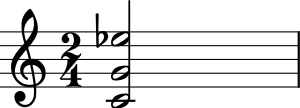

In [26]:
cMinor.show()

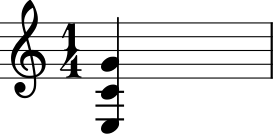

In [27]:
cMajor.show()

这些和弦都有点“太远了”，让我们在 closedPosition()得到c：

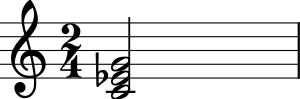

In [28]:
cClosed = cMinor.closedPosition()
cClosed.show()

请注意，cMinor它没有改变。被紧凑的和弦只有 cClosed：

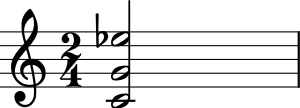

In [29]:
cMinor.show()

如果要更改Chord对象本身，则调用 .closedPosition(inPlace=True)来更改原始对象。由于原件已更改，因此我们无需在其前面放置x = ...

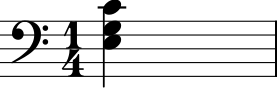

In [30]:
cMajor.closedPosition(inPlace=True)
cMajor.show()

还有一种方法， semiClosedPosition()其作用类似于 .closedPosition，如果该步骤已经存在音高（即Db和D#均为“ D”），则该音符将向上移动一个八度。这对于以尽可能紧凑的形式显示复杂的和弦音色很有用：

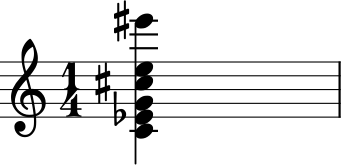

In [31]:
c1 = chord.Chord(['C4', 'E5', 'C#6', 'E-7', 'G8', 'C9', 'E#9'])
c2 = c1.semiClosedPosition()
c2.show()

我们可以通过common name获取每个和弦：

In [32]:
cn1 = cMinor.commonName
print(cn1)

minor triad


In [33]:
print(cMajor.commonName)

major triad


和弦越复杂，其“commonName”就越少。这是美国作曲家埃利奥特·卡特（Elliott Carter）最喜欢的一个。

In [34]:
elliottCarterChord = chord.Chord(['C4','D-4','E4','F#4'])
elliottCarterChord.commonName

'all-interval tetrachord'

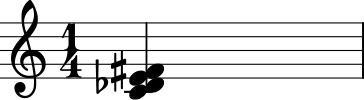

In [35]:
elliottCarterChord.show()

### 更多和弦的制作方法；和弦与流
如果您愿意，还有其他创建和弦的方法。一种方法是从一堆已经创建的Note对象中进行：

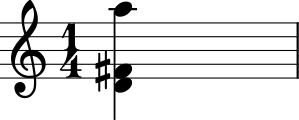

In [36]:
d = note.Note('D4')
fSharp = note.Note('F#4')
a = note.Note('A5')
dMajor = chord.Chord([d, fSharp, a])

dMajor.show()

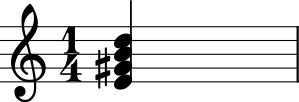

In [37]:
e7 = chord.Chord("E4 G#4 B4 D5")
e7.show()

八度是可选的，尤其是当所有内容都在八度之内时：

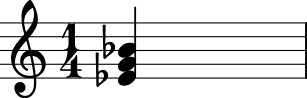

In [38]:
es = chord.Chord("E- G B-")
es.show()

但是，如果一个和弦越过一个八度的边界（在B和C之间），您肯定会想要它们。除非您喜欢6-4和弦，否则可能不是您想要的：

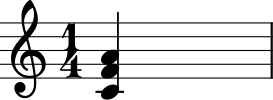

In [39]:
fMajor = chord.Chord("F A C")
fMajor.show()

请注意，由于C在F和A之前排序，所以该和弦处于第二个倒数，即64。我们可以找出Chord类似的倒数：

In [40]:
print(fMajor.inversion(), fMajor.inversionName())

2 64


除了.commonName之外，还有一些其他有趣的“名称”属性

In [41]:
fMajor.fullName

'Chord {F | A | C} Quarter'

In [42]:
fMajor.pitchedCommonName

'F-major triad'

像Note对象一样，我们可以将Chord对象放在内 Stream：

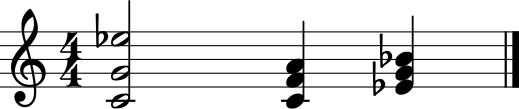

In [43]:
stream1 = stream.Stream()
stream1.append(cMinor)
stream1.append(fMajor)
stream1.append(es)
stream1.show()

我们可以混合和匹配Notes，Rests以及Chords：

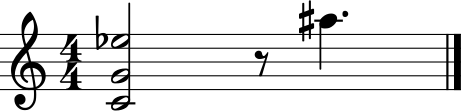

In [44]:
rest1 = note.Rest()
rest1.quarterLength = 0.5
noteASharp = note.Note('A#5')
noteASharp.quarterLength = 1.5

stream2 = stream.Stream()
stream2.append(cMinor)
stream2.append(rest1)
stream2.append(noteASharp)
stream2.show()

### 后调和弦（简短）
有许多方法可以处理和弦的后音调方面。如果您对20世纪的音乐不感兴趣，请继续并跳到下一章，但是，这里有一些有趣的事情。

该intervalVector和弦的是数量的名单 和弦或反转。例如，一个小三合会有一个小三分之一（C到E平），一个大三分（E平坦到G）和一个完美的四分之一（上面的G到C，因为八度无关紧要）：[semitones, whole-tones, minor-thirds/augmented-seconds, major-thirds, perfect fourths, and tritones]

In [45]:
cMinor.intervalVector

[0, 0, 1, 1, 1, 0]

In [46]:
cMajor.intervalVector

[0, 0, 1, 1, 1, 0]

In [47]:
elliottCarterChord.intervalVector

[1, 1, 1, 1, 1, 1]

好吧，这几乎是唯一的：还有另一个具有相同和弦的和弦 .intervalVector。该和弦称为其Z关系或Z对。

In [48]:
elliottCarterChord.hasZRelation

True

In [49]:
otherECChord = elliottCarterChord.getZRelation()
otherECChord

<music21.chord.Chord C D- E- G>

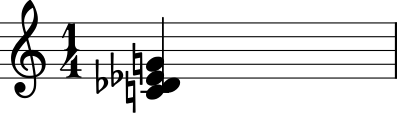

In [50]:
otherECChord.show()

In [51]:
otherECChord.intervalVector

[1, 1, 1, 1, 1, 1]

下面提供了您可能感兴趣的其他调后工具。我们将在后面的章节中再次介绍它们，但这是三个重要的方面：

In [52]:
print(elliottCarterChord.primeForm)

[0, 1, 4, 6]


In [53]:
print(elliottCarterChord.normalOrder)

[0, 1, 4, 6]


In [54]:
print(elliottCarterChord.forteClass)

4-15A


如果您真的只关心半音，则可以使用pitchClasses创建一个和弦：

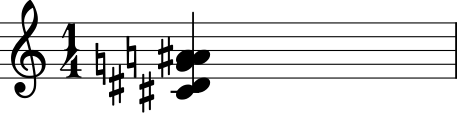

In [55]:
oddChord = chord.Chord([1, 3, 7, 9, 10])
oddChord.show()

A和A＃在同一空间上有一个小问题，这使得它很难阅读。让我们将A＃翻转到Bb：

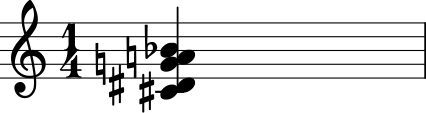

In [56]:
oddChord.pitches[-1].getHigherEnharmonic(inPlace=True)
oddChord.show()

如果您使用高于11的pitchClasses，则它们将被视为MIDI数字，其中60 = MiddleC，72 = C5等。自动选择谐音拼写。

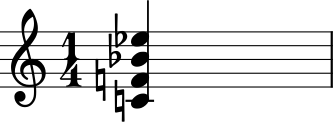

In [57]:
midiChordType = chord.Chord([60, 65, 70, 75])
midiChordType.show()

好的，现在您已经了解了Notes和弦的基础知识（以及更多知识！）。如果您自己看不到它们，则 第8章：安装MusicXML Reader 将对其进行修复。它还将介绍的基本文件格式 music21。